<a href="https://colab.research.google.com/github/veeralipi22/14-neural-networks-/blob/main/fireforests_Neural_networks(N).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [ ]:
forest=pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df = forest.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
df.columns


Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [ ]:
df.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

**Feature Analysis**

In [ ]:
df.month.value_counts()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
# The dataset is biased. Lets remove the bias.
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [ ]:
# Label Encoding
# We are going to perform label encoding since it is faster than dummy variables

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month)
df.day= label_encoder.fit_transform(df.day)
df.size_category= label_encoder.fit_transform(df.size_category)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


**Removing Bias in the Dataset**

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()

# SMOTEK TECHNIQUE

# Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

# Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

# Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 378, 0: 139})
Counter({1: 368, 0: 368})


In [ ]:
# Splitting the data into train and test
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

**Neural Network Modelling**

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 2s 17ms/step - loss: 0.6916 - accuracy: 0.5449 - val_loss: 0.6851 - val_accuracy: 0.7529
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.6087 - val_loss: 0.6585 - val_accuracy: 0.6529
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.6783 - val_loss: 0.5973 - val_accuracy: 0.6353
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5606 - accuracy: 0.6986 - val_loss: 0.5095 - val_accuracy: 0.8059
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.8232 - val_loss: 0.4234 - val_accuracy: 0.7882
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.3791 - accuracy: 0.8870 - val_loss: 0.3356 - val_accuracy: 0.9412
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.2991 - accuracy: 0.9014 - val_loss: 0.3013 - val_accuracy: 0.9706
Epoch 8/50
35/35 [=

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9955


In [ ]:
print(hist.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.029019,0.991304,0.037713,0.994118,45
46,0.030308,0.988406,0.037609,0.994118,46
47,0.042588,0.991304,0.031413,0.988235,47
48,0.023967,0.991304,0.033434,0.982353,48
49,0.072018,0.971014,0.051858,0.982353,49


**Visualization**

In [ ]:
# Pairplot
#sns.pairplot(df, hue='size_category')

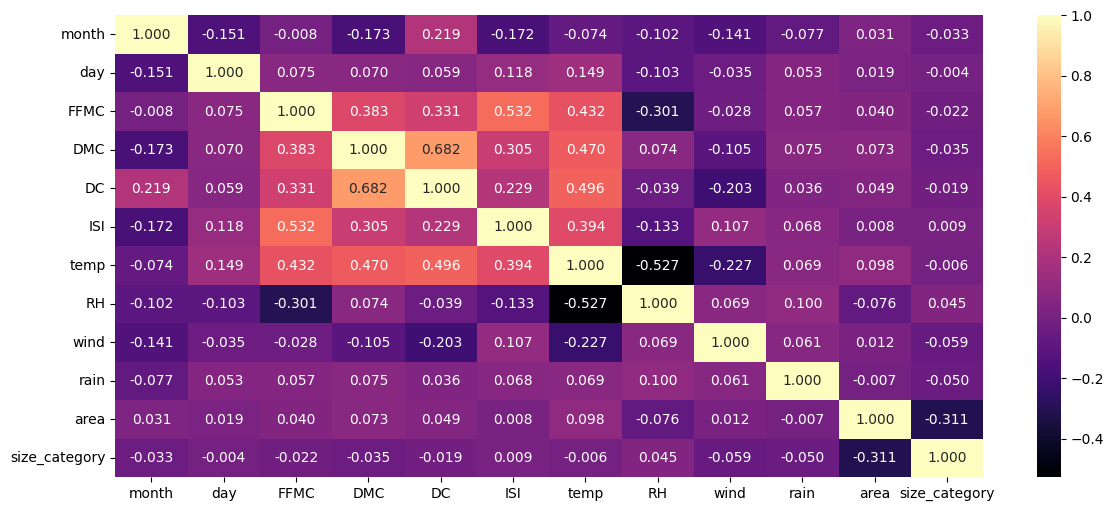

In [ ]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

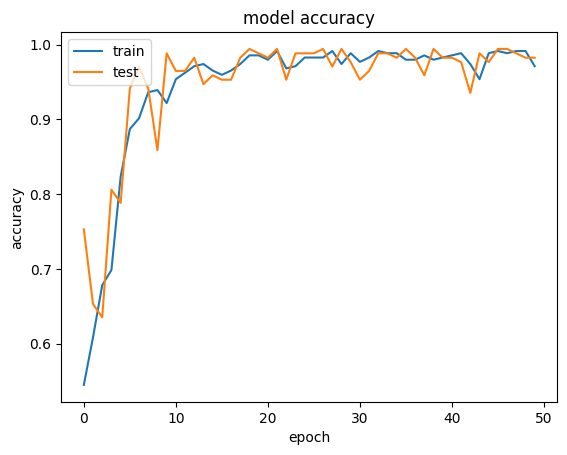

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

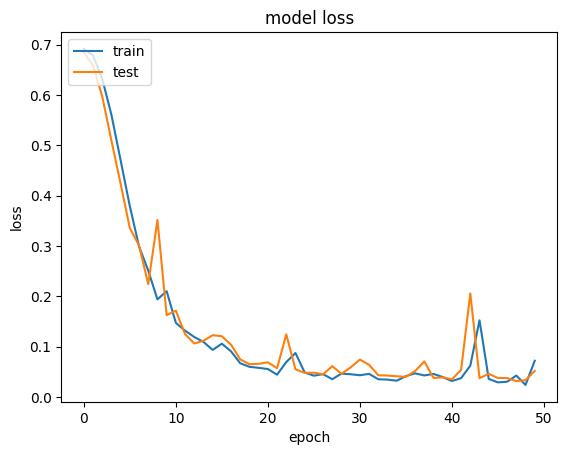

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Tuning of Hyperparameters using different techniques**

1)Batch Size and Epochs.

2)Learning rate and Drop out rate.

3)Activation Function and Kernel Initializer.

4)Number of Neurons in Activation layer.

5)Training model with optimum values of Hyperparameters


**1)Batch Size and Epochs.**

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

**Tuning of Hyperparameters:- Learning rate and Drop out rate**

SyntaxError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


ModuleNotFoundError: ignored

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)

NameError: ignored

In [ ]:
# Create the model
model2 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 20,epochs = 50)

In [ ]:
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

In [ ]:
# Make a dictionary of the grid search parameters
param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

In [ ]:
# Build and fit the GridSearchCV
grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_standardized,Y)


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))

# Best score for Dropout rate = 0.2 and learning rate is 0.001

**Tuning of Hyperparameters:- Activation Function and Kernel Initializer**

In [ ]:
# Defining the model
def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model
model3 = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 20,epochs = 50)

In [ ]:
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [ ]:
# Make a dictionary of the grid search parameters
param_grids3 = dict(activation_function = activation_function,init = init)

In [ ]:
# Build and fit the GridSearchCV
grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_standardized,Y)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))

# Best activation function in our case would be Relu and Kernel Initializer is Uniform

**Tuning of Hyperparameter :- Number of Neurons in activation layer**

In [ ]:
# Defining the model

def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model
model4 = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 20,epochs = 50)

In [ ]:
# Define the grid search parameters
neuron1 = [4,8,14]
neuron2 = [4,8,12]

In [ ]:
# Make a dictionary of the grid search parameters
param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

In [ ]:
# Build and fit the GridSearchCV
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_standardized,Y)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

#Best results are Neuron 1 = 4 and Neuron 2 = 4

**Hyperparameters all at once**

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

In [ ]:
# Defining the model
def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model
model_fnl = KerasClassifier(build_fn = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)

In [ ]:
# Splitting the data into training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_standardized,Y, test_size = 0.3)

In [ ]:
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))
report_model(model_fnl)